# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 5. Вероятность. 


**Правила, <font color="red">прочитайте внимательно</font>:**


* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

---


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 35 баллов за контест и 5 баллов за ноутбук
* Задача 2 &mdash; 20 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 40 баллов

In [ ]:
# Bot check

# HW_ID: fpmi_ad5
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [779]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.

Условие задачи в контесте, ссылка на который отправлена через бот.

Продублируйте сюда написанный код и постройте требуемые графики, которые при необходимости можно доработать.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Закомментируйте строку ниже для запуска локально
#from coin import coin, uniform_pdf, norm_pdf, expon_pdf


# Для запуска локально используйте:
#
import scipy.stats as sps

coin = sps.bernoulli(p=0.5).rvs
uniform_pdf = sps.uniform.pdf
norm_pdf = sps.norm.pdf
expon_pdf = sps.expon.pdf

In [312]:
def uniform(size=1, precision=30):
    if (type(size) is tuple):
        tmp = np.array(coin(np.prod(size) * precision)).reshape(*size, precision)
    else:
        tmp = np.array(coin(np.prod(size) * precision)).reshape(size, precision)
    tmp = tmp.dot(np.flip(2**np.arange(precision)))
    tmp = tmp / (2**precision)
    return tmp  # Читабельное решение в одну строчку не выходя за границы? ;)

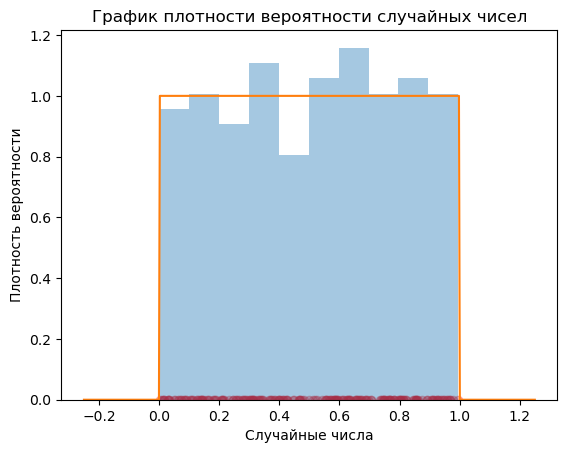

In [467]:
def plot_uniform_density(size=200):
    data = np.zeros(size)
    grid = uniform(size)  # равномерная сетка от -0.25 до 1.25 из 500 точек
    fig, ax = plt.subplots()
    plt.scatter(x=grid, y=data, alpha=0.3, c='red')
    plt.hist(grid, bins=10, alpha=0.4, density=True)
    r = np.linspace(-0.25, 1.25, 500)
    ax = plt.plot(r, uniform_pdf(r))
    plt.xlabel("Случайные числа")
    plt.ylabel("Плотность вероятности")
    plt.title("График плотности вероятности случайных чисел")
    return plt.gcf()
plot_uniform_density();

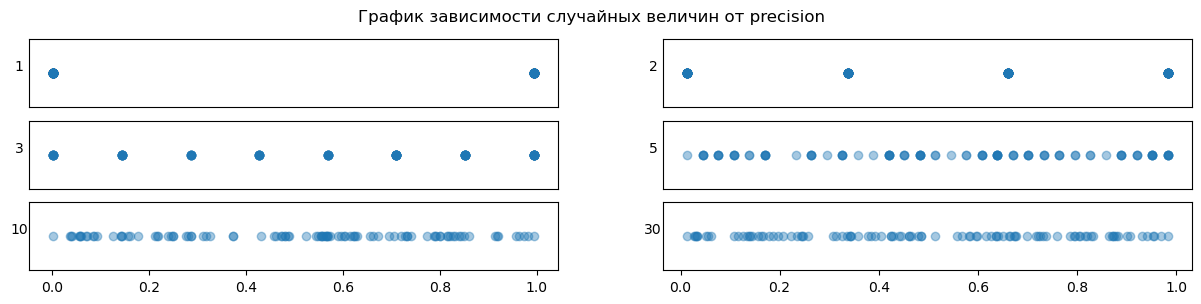

In [474]:
def plot_uniform_different_precision(size=100):
    # определите график размера 15 на 3
    fig = plt.figure(figsize=(15, 3))
    plt.suptitle("График зависимости случайных величин от precision")
    for i, precision in enumerate([1, 2, 3, 5, 10, 30]):
        plt.subplot(3, 2, i + 1)
        plt.scatter(x=uniform(size, precision), y=np.zeros(size), alpha=0.4)
        plt.yticks([])
        if i < 4:
            plt.xticks([])
        plt.ylabel(precision, rotation=0)
    return plt.gcf()
plot_uniform_different_precision();

In [480]:
def normal(size=1, loc=0, scale=1, precision=30):
    data_a = uniform(size, precision)
    data_b = uniform(size, precision)
    data_a = np.cos(2 * np.pi * data_a) * np.sqrt(-2 * np.log(data_b))
    data_b = np.sin(2 * np.pi * data_a) * np.sqrt(-2 * np.log(data_b))
    data_a = loc + data_a * np.sqrt(scale)
    data_b = loc + data_b * np.sqrt(scale)
    return data_a

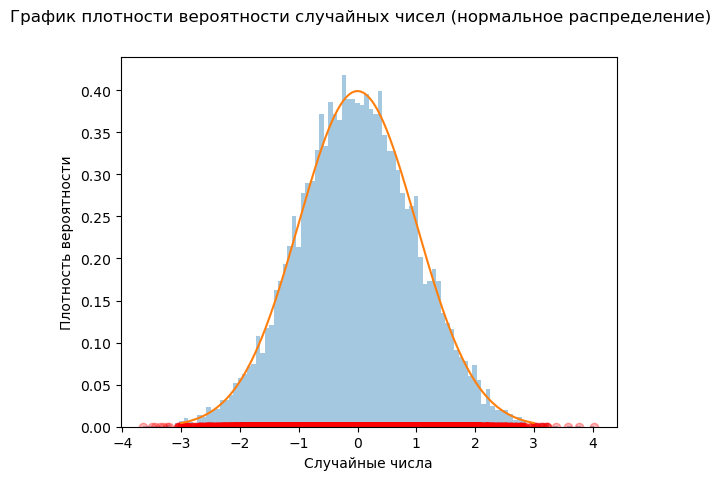

In [577]:
def plot_normal_density(size=200):
    grid = normal(size)
    data = np.zeros(size)
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax = plt.hist(grid, bins=100, alpha=0.4, density=True)
    ax = plt.scatter(x=grid, y=data, alpha=0.3, c='red')
    r = np.linspace(-3, 3, 500)
    ax = plt.plot(r, norm_pdf(r))
    plt.suptitle("График плотности вероятности случайных чисел (нормальное распределение)")
    plt.xlabel("Случайные числа")
    plt.ylabel("Плотность вероятности")
    return plt.gcf();
plot_normal_density(10000);

Во всех графиках я использовал увеличение bins для наглядности

In [566]:
def expon(size=1, lambd=1, precision=30):
    data = uniform(size, precision)
    return -1/lambd * np.log(1 - data)

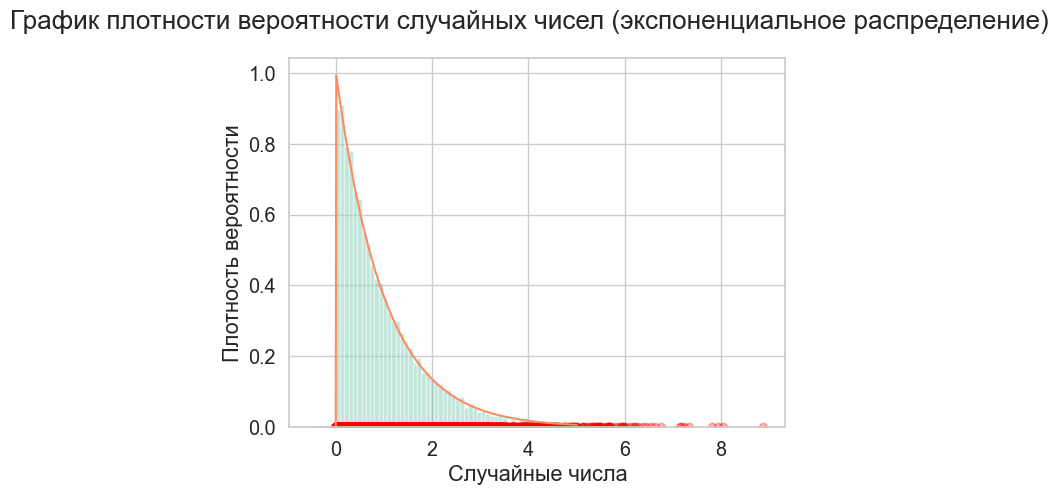

In [910]:
def plot_expon_density(size=100):
    grid = expon(size)
    data = np.zeros(size)
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax = plt.hist(grid, bins=100, alpha=0.4, density=True)
    ax = plt.scatter(x=grid, y=data, alpha=0.3, c='red')
    r = np.linspace(-0.5, 5, 500)
    ax = plt.plot(r, expon_pdf(r))
    plt.suptitle("График плотности вероятности случайных чисел (экспоненциальное распределение)")
    plt.xlabel("Случайные числа")
    plt.ylabel("Плотность вероятности")
    return plt.gcf()
plot_expon_density(10000);

In [ ]:
def plot_normal_density(size=200):
    grid = normal(size)
    data = np.zeros(size)
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax = plt.hist(grid, bins=10, alpha=0.4, density=True)
    ax = plt.scatter(x=grid, y=data, alpha=0.3, c='red')
    r = np.linspace(-3, 3, 500)
    ax = plt.plot(r, norm_pdf(r))
    plt.suptitle("График плотности вероятности случайных чисел (нормальное распределение)")
    plt.xlabel("Случайные числа")
    plt.ylabel("Плотность вероятности")
    return plt.gcf();
plot_normal_density(1000);

**Выводы:**

Мы смоделировали при помощи подбрасываний монетки равномерное, нормальное и экспоненциальное распределение, рассмотрели зависимость значений случайных величин от количества подбрасываний монетки. Построили графики всех распределений.

---

### Задача 2.

Рассмотрим распределение Коши с плотностью
$$p(x) = \frac{1}{\pi(1+x^2)}$$
для $x\in\mathbb{R}$, которое известно своими тяжелыми хвостами. Иначе говоря, плотность убывает медленно при $x \to \infty$. Сравните, например, с нормальным или экспоненциальным распределениями. В частности, из-за этого у распределения Коши даже не существует математического ожидания.

За распределение Коши отвечает класс <a target="_black" href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html">`scipy.stats.cauchy`</a>.

**1.** Визуализируйте на одном графики плотности нормального распределения и распределения Коши. Что можно сказать?

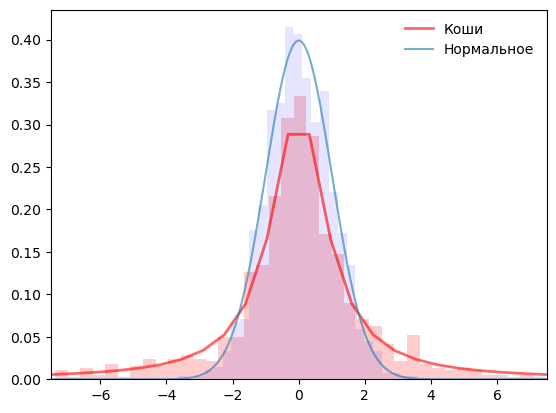

In [563]:
def cauchy_normal(count=1000):
    fig, ax = plt.subplots(1, 1)
    x= np.linspace(sps.cauchy.ppf(0.01), sps.cauchy.ppf(0.99), 100)
    ax.plot(x, sps.cauchy.pdf(x), 'r-', lw=2, alpha=0.6, label='Коши')
    r = sps.cauchy.rvs(size=count)
    ax.hist(r, density=True, bins='auto', alpha=0.2, color='red')
    ax.set_xlim([-7.5, 7.5])

    r = np.linspace(-10, 10, 5000)
    ax.plot(r, norm_pdf(r), alpha=0.6, label="Нормальное")
    data1 = np.random.normal(size=count)
    ax.hist(data1, density=True, bins='auto', alpha=0.1, color='blue')
    ax.legend(loc='best', frameon=False)
    return plt.gcf()
cauchy_normal(1000);

**2.** Повторите эксперимент с <a href="https://miptstats.github.io/courses/ad_fivt/lec3_LLN.html">занятия</a> про закон больших чисел для распределения Коши. Выполняется ли закон? 

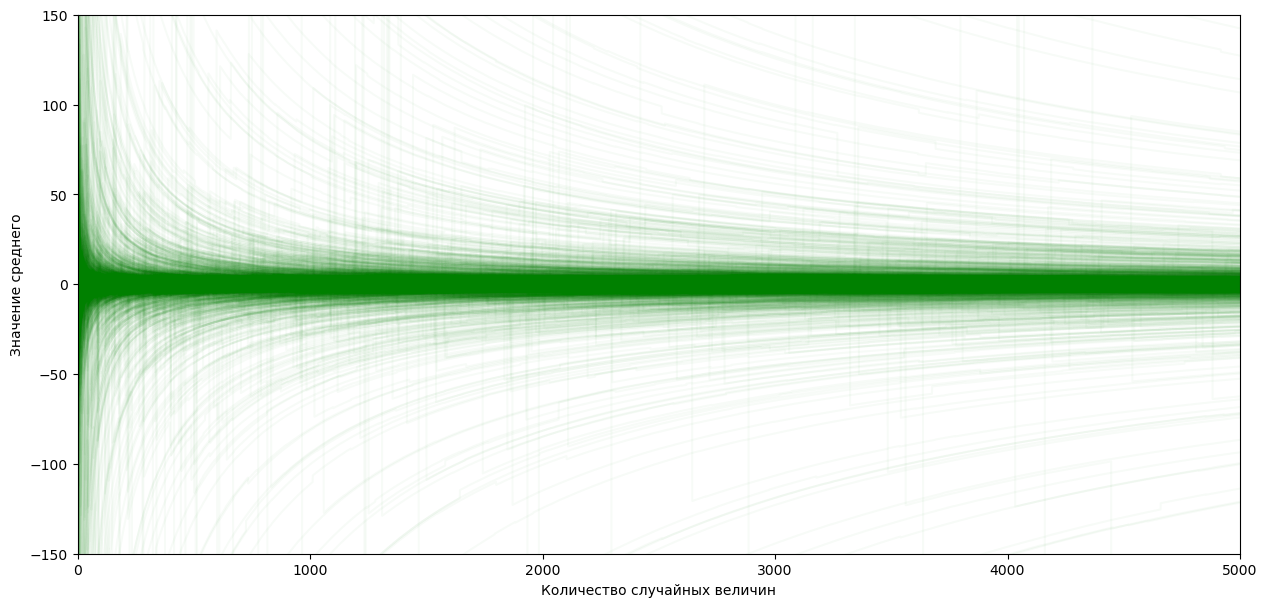

In [650]:
size = 5000  # количество случайных величин
samples_count = 5000  # количество выборок

samples = sps.cauchy.rvs(size=(samples_count, size))
cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)

plt.figure(figsize=(15, 7))

# рисуем для каждой выборки отдельно
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, cum_means[i], color='green', alpha=0.03)

plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.ylim((-150, 150))
plt.xlim((0, size));

Значение среднего довольно-таки сильно отклоняется от математического ожидания, даже при больших n (количество случайных величин), значит не сходится.

**3.** Аналогичным образом проведите эксперимент по изучению зависимости *выборочной* медианы от размера выборки. Медиану по выборке можно посчитать с помощью <a target="_blank" href="https://numpy.org/doc/stable/reference/generated/numpy.median.html">`np.median`</a>.

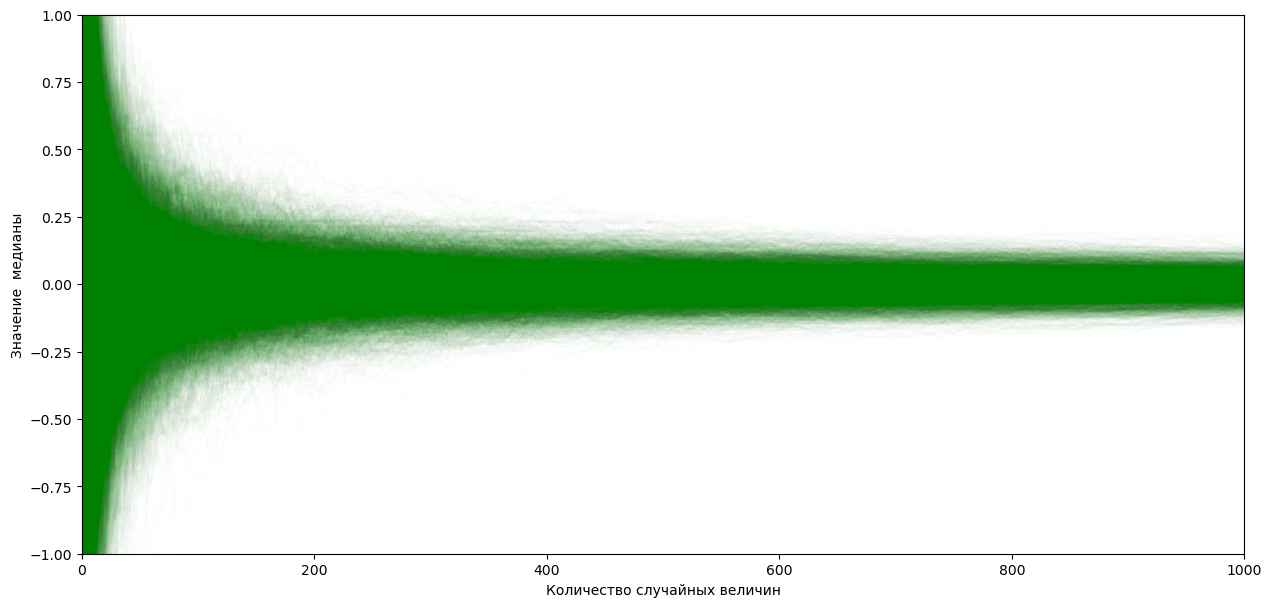

In [662]:
size = 1000  # количество случайных величин
samples_count = 5000  # количество выборок

plt.figure(figsize=(15, 7))

for i in range(samples_count):
    med = []
    data = sps.cauchy.rvs(size=size)
    for j in range(size):
        med.append(np.median(data[0:j]))
    plt.plot(np.arange(size) + 1, med, color='green', alpha=0.01)

plt.xlabel('Количество случайных величин')
plt.ylabel('Значение  медианы')
plt.ylim((-1, 1))
plt.xlim((0, size));

При достаточность большом количестве случайных величин значение медианы не сильно откланяется от 0, значит сходится

**Вывод:**

Мы проанализировали распределение Коши, сравнили его график с графиком нормального распределения, рассмотрели и визуализировали закон больших чисел для среднего значения и медианы.

### <font color="orange"><i>Сложная часть</i></font>

### Задача 3.

Перед выполнением этой задачи настоятельно рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/lec3_LLN.html">ноутбук</a> с лекции про закон больших чисел.

На практике не редко возникает вопрос &mdash; **сколько времени потребуется на сбор данных, чтобы оценить среднее с достаточной точностью**. Для ответа на этот вопрос можно использовать различные теоретические оценки, в частности, неравенство Чебышева.

Другой способ &mdash; смоделировать большое количество выборок.
Возьмем в качестве меры отклонения от среднего *среднее значение модуля отклонения от среднего*, то есть
$$F(n) = \frac{1}{K}\sum\limits_{j=1}^{K} \left| S_{nj} - a \right|,$$
где $a$ &mdash; математическое ожидание элемента выборки, $S_{nj}$ &mdash; *выборочное* среднее $n$ элементов в $j$-й выборке, а $K$ &mdash; общее количество выборок.

**1.** Рассмотрим распределения $Bern(a)$ для $a=0.5$. Пусть для нас допустимо отклонение на 0.02, иначе говоря при *истинном* среднем 0.5 мы считаем достаточно точными значения *выборочного* среднего от 0.48 до 0.52. Тогда в качестве *приближения* необходимого размера выборок можно взять наименьшее значение $n$, при котором $F(n) \leqslant 0.02$.

Реализуйте данный эксперимен для $K=500$  и найдите значение $n$. Визуализируйте зависимость $F(n)$ от $n$ в обычном и логарифмическом масштабах (по тем осям, по которым это имеет смысл).

Для реализации без циклов стоит генерировать достаточно большие выборки и использовать функцию `np.where`.

Реализуем функцию bern_func, которая будет выдавать F(n) (нужна для первых двух графиков):

In [871]:
def bern_func(size=400, a=0.5, k=500):
    return (1 / k * sum(abs((sps.bernoulli.rvs(a, size=(k, size)).sum(axis=1) / size) - 0.5)))

Реализуем функцию result_n, которая будет выдавать n -- размер необходимой выборки для нужной точности:

In [889]:
def result_n(a=0.05):
    k = 500
    size = 1000
    tmp = 1 / k * sum(abs(sps.bernoulli.rvs(a, size=(k, size)).cumsum(axis=1) / (np.arange(size) + 1) - a))
    result_n = np.where(tmp < 0.02)
    return result_n[0][0]

Построим нужные графики:

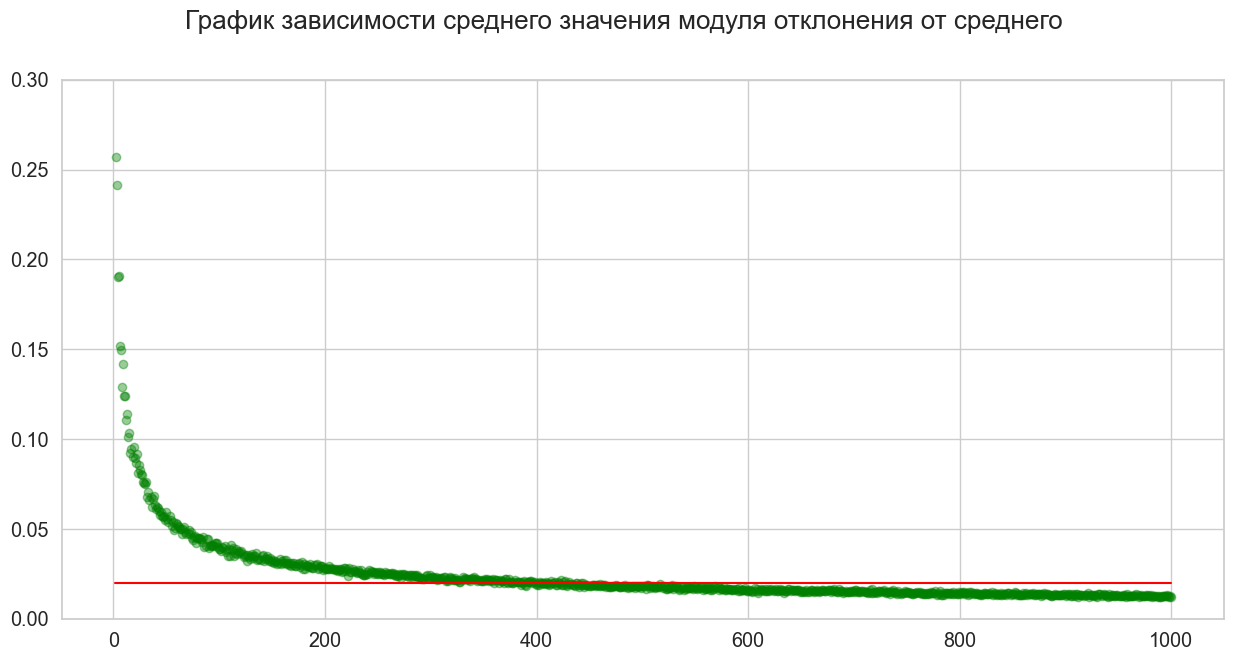

In [813]:
fig, ax = plt.subplots(figsize=(15, 7))
bern_func_res = []
for i in range(1000):
    if (flag and bern_func(i + 1) < 0.02):
        res = i + 1
        flag = False
    bern_func_res.append(bern_func(i + 1))
ax.scatter(x=(np.arange(1000) + 1), y=bern_func_res, alpha=0.4, c='green')
ax.plot((np.arange(1000) + 1), [0.02 for i in range(1000)], color='red', markeredgewidth=1)
plt.suptitle("График зависимости среднего значения модуля отклонения от среднего")
plt.ylim((0, 0.3))
None

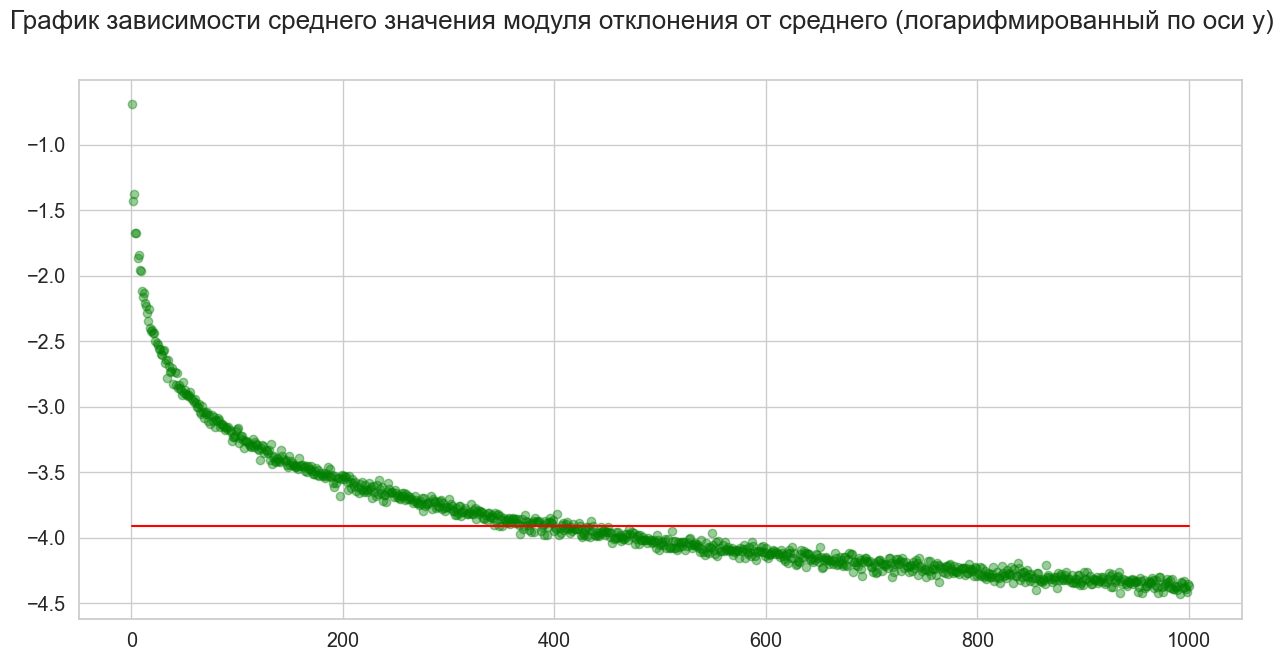

In [787]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.scatter(x=(np.arange(1000) + 1), y=np.log(bern_func_res), alpha=0.4, c='green')
ax.plot((np.arange(1000) + 1), [np.log(0.02) for i in range(1000)], color='red', markeredgewidth=1)
plt.suptitle("График зависимости среднего значения модуля отклонения от среднего (логарифмированный по оси y)")
None

Теперь подсчитаем n -- размер необходимой выборки для a = 0.5

In [909]:
result_n(0.5)

427

Полученное значение result_n(0.5) хорошо совпадает с полученном на графике (которое можно прикинуть на глаз), значит мы все делаем правильно.

**2.** Повторите данный эксперимент для значений $a$ от 0.05 до 0.95 с шагом 0.05. Визуализируйте зависимость необходимого размера выборки $n$ от значения $a$.

При реализации можно сделать цикл по значениям $a$.

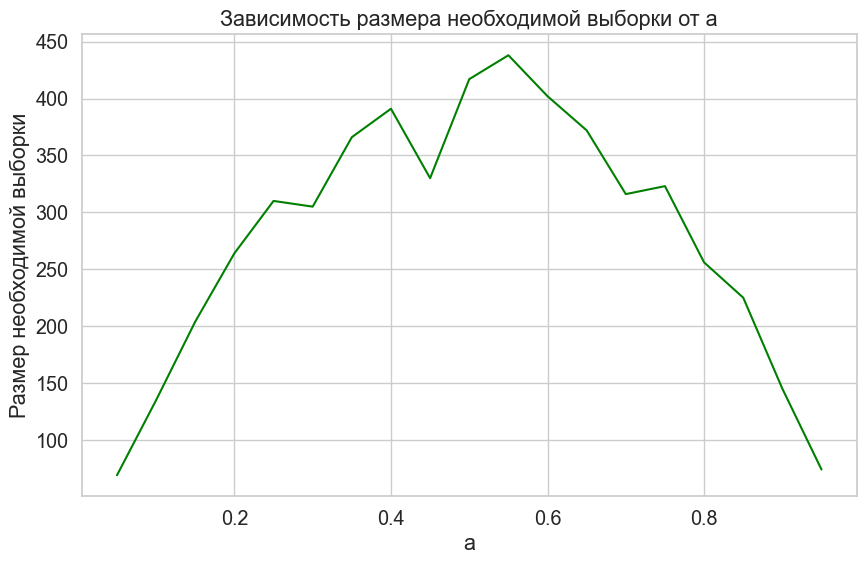

In [908]:
a_res = []
n_res = []
for i in range(5, 100, 5):
    i = i / 100
    a_res.append(i)
    n_res.append(result_n(i))
plt.figure(figsize=(10, 6))
plt.plot(a_res, n_res, color='green')
plt.title("Зависимость размера необходимой выборки от a")
plt.xlabel('a')
plt.ylabel('Размер необходимой выборки')
None

**Выводы:**

Мы проанализировали среднее значение модуля отклонения от среднего от количества выборочных элементов (F(n)), для a = 0.5 построили и проанализировали графики, определили наименьшее n для которого F(n) < 0.02 двумя способами: из графика и математически, сравнили эти значения и они практически совпали.
Также построили зависимость наименьших n для которого F(n) < 0.02 от коэффициента a, построили график и заметили, что его максимум при a = 0.5. То есть при значении коэффициента a = 0.5, необходим наибольший размер выборки для получения необходимой точности.